#**Adult census income prediction**

#Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Reading the dataset

In [ ]:
data = pd.read_csv('adult.csv')

#Descriptive analysis

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

In [ ]:
#checking dtype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#checking missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

We don't have any null values in our dataset

In [ ]:
#Statistical summary
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#Visualization of Numeric columns

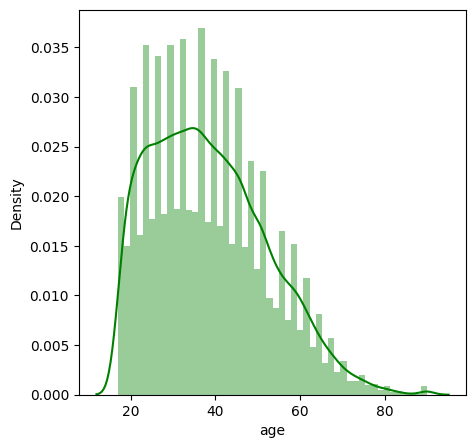

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['age'], color='green')
plt.show()

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

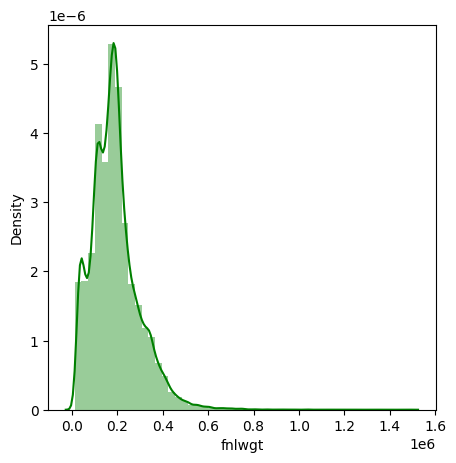

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['fnlwgt'], color='green')
plt.show()

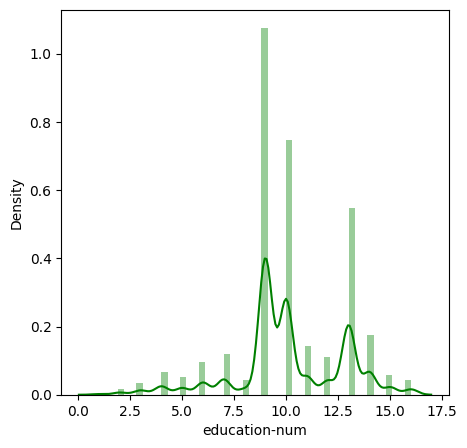

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['education-num'], color='green')
plt.show()

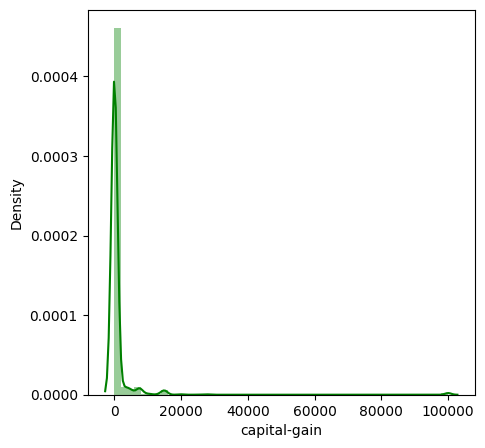

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['capital-gain'], color='green')
plt.show()

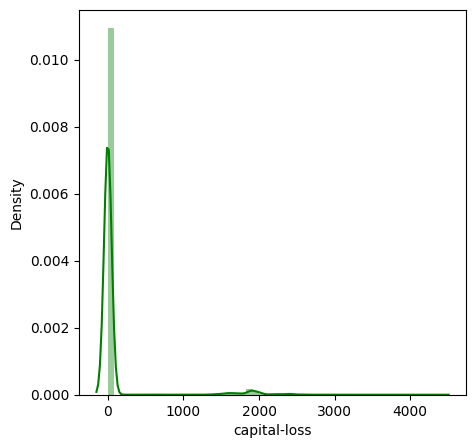

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['capital-loss'], color='green')
plt.show()

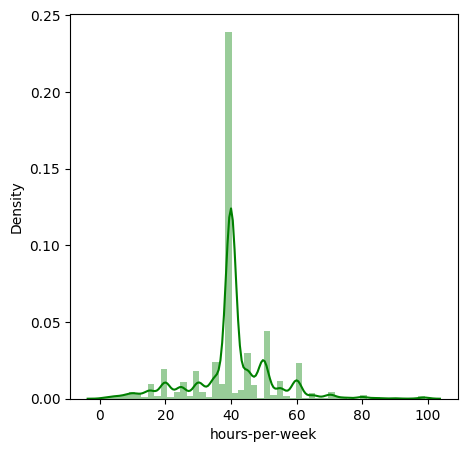

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['hours-per-week'], color='green')
plt.show()

#Countplot Visualization

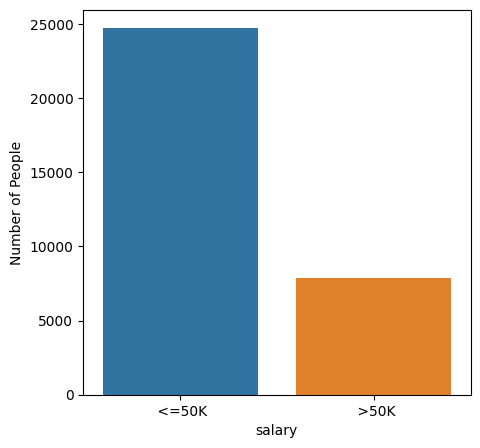

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='salary', data=data)
plt.ylabel('Number of People')

plt.show()

#Conclusion:
More people are having salary less than or equal to 50k and less are having salary greater than 50k

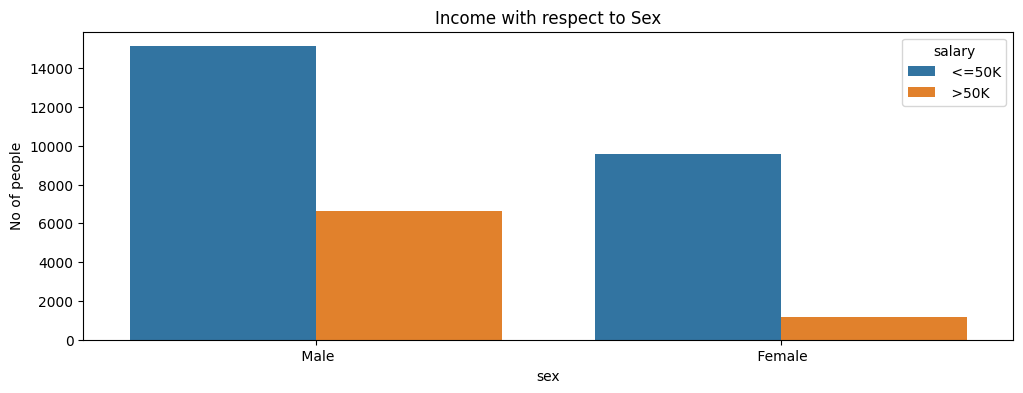

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=data, x='sex', hue='salary')
plt.xlabel('sex')
plt.ylabel('No of people')
plt.title('Income with respect to Sex')
plt.show()

#Conclusion:
Male are having more salary than female

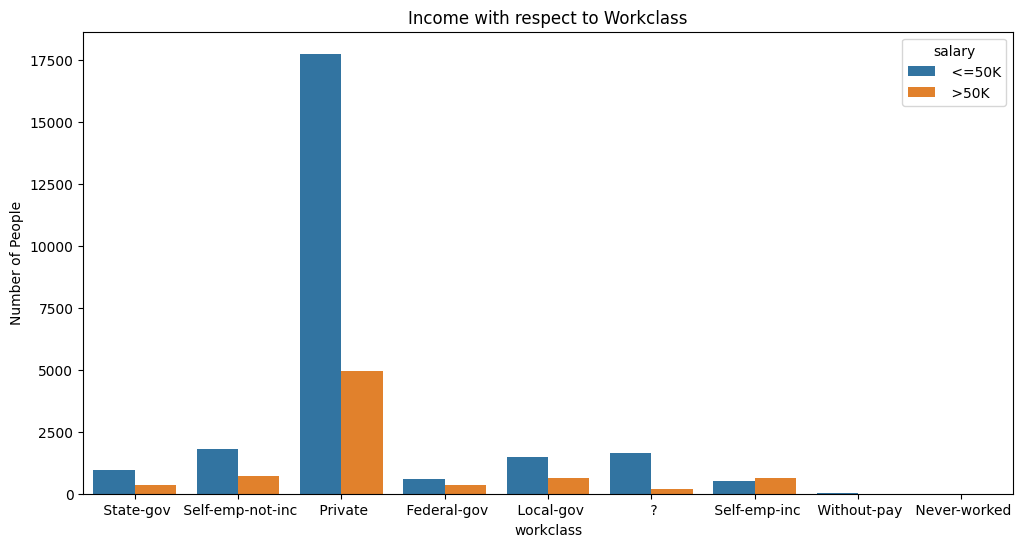

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', data=data, hue='salary')
plt.ylabel('Number of People')
plt.title('Income with respect to Workclass')
plt.show()

#Conclusion:
people working in private sector are having more salary than others.

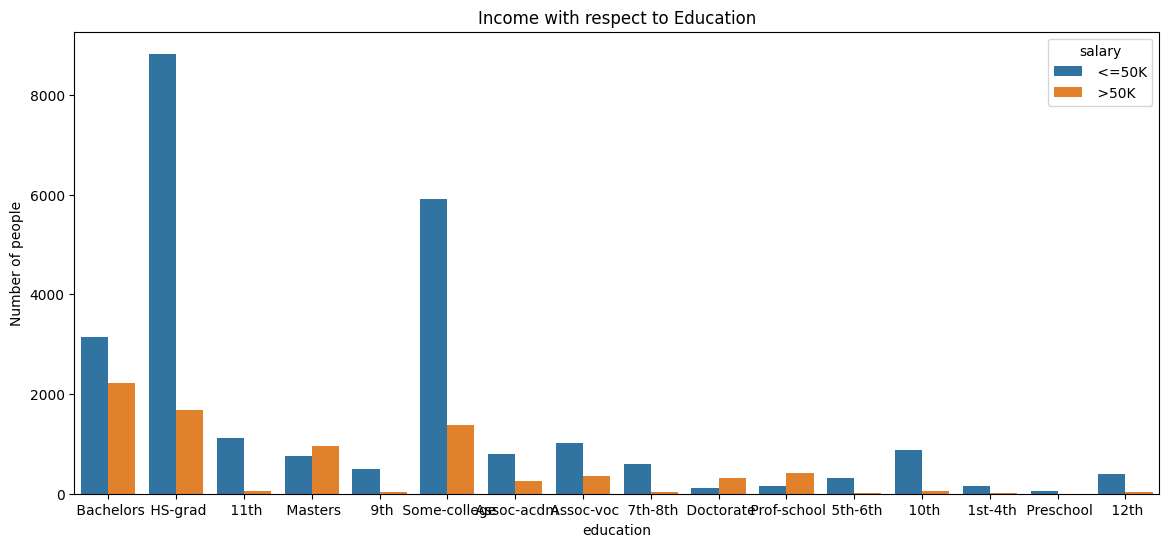

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x='education', data=data, hue='salary')
plt.ylabel('Number of people')
plt.title('Income with respect to Education')
plt.show()

#Conclusion:
Here we can see that people who have HS-grad have more salary <=50k.

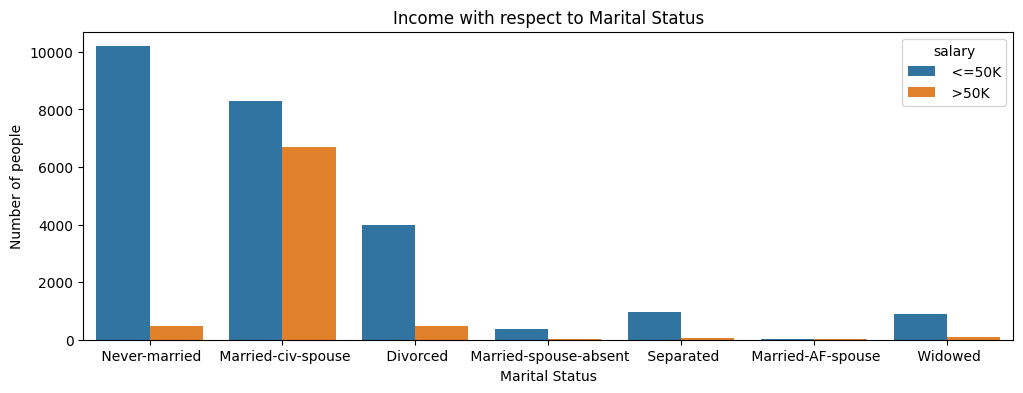

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='marital-status', data=data, hue='salary')
plt.title('Income with respect to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.show()

#Conclusion:
Married people living with their spouse have high salary in both <=50k and >50k

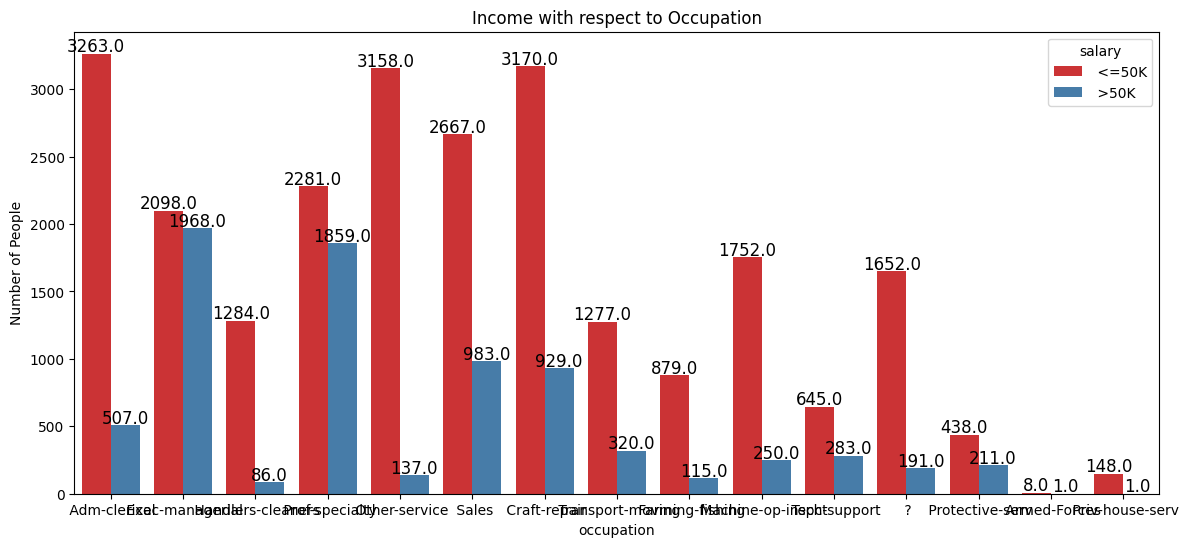

In [ ]:
plt.figure(figsize=(14, 6))
sns.set_palette("Set1")

ax = sns.countplot(x='occupation', data=data, hue='salary' )
plt.title('Income with respect to Occupation')
plt.ylabel('Number of People')

#Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#Conclusion:
People who's occupation is Excel managerial are having more salary than others.

People who's occupation is Armed Forces are having least Salary

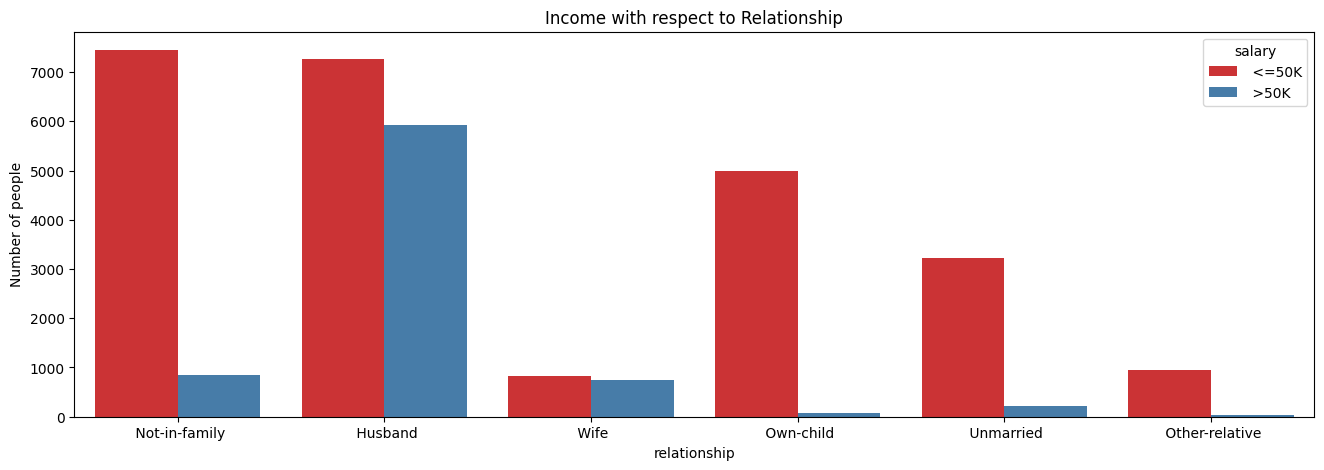

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(x='relationship', data=data, hue='salary')
plt.ylabel('Number of people')
plt.title('Income with respect to Relationship')
plt.show()

#Conclusion:
We can clearly see than Husband is having more salary than others.

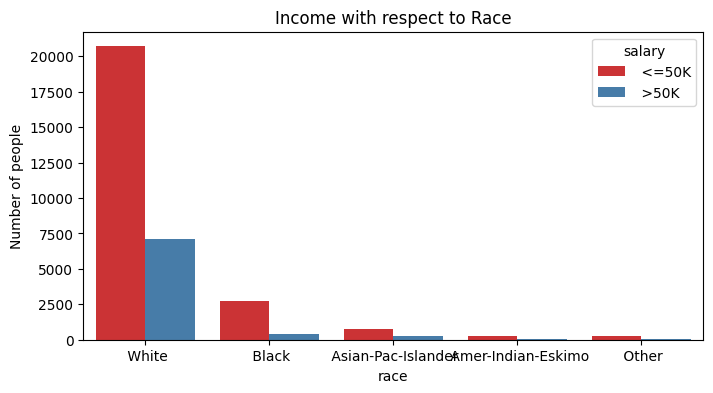

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='race', data=data, hue='salary')
plt.ylabel('Number of people')
plt.title('Income with respect to Race')
plt.show()

#Conclusion:
White people are earning more salary than others.

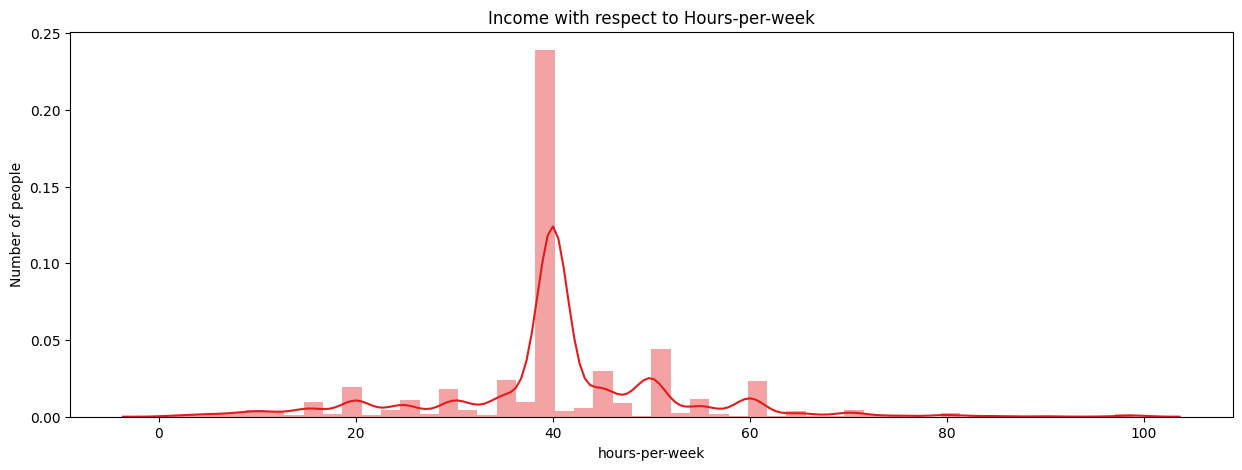

In [ ]:
plt.figure(figsize=(15,5))

sns.distplot(data['hours-per-week'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Number of people')
plt.title('Income with respect to Hours-per-week')
plt.show()

#Conclusion:
People who work for 40hrs per week are getting more salary than others.

#Pairplot

<Figure size 800x400 with 0 Axes>

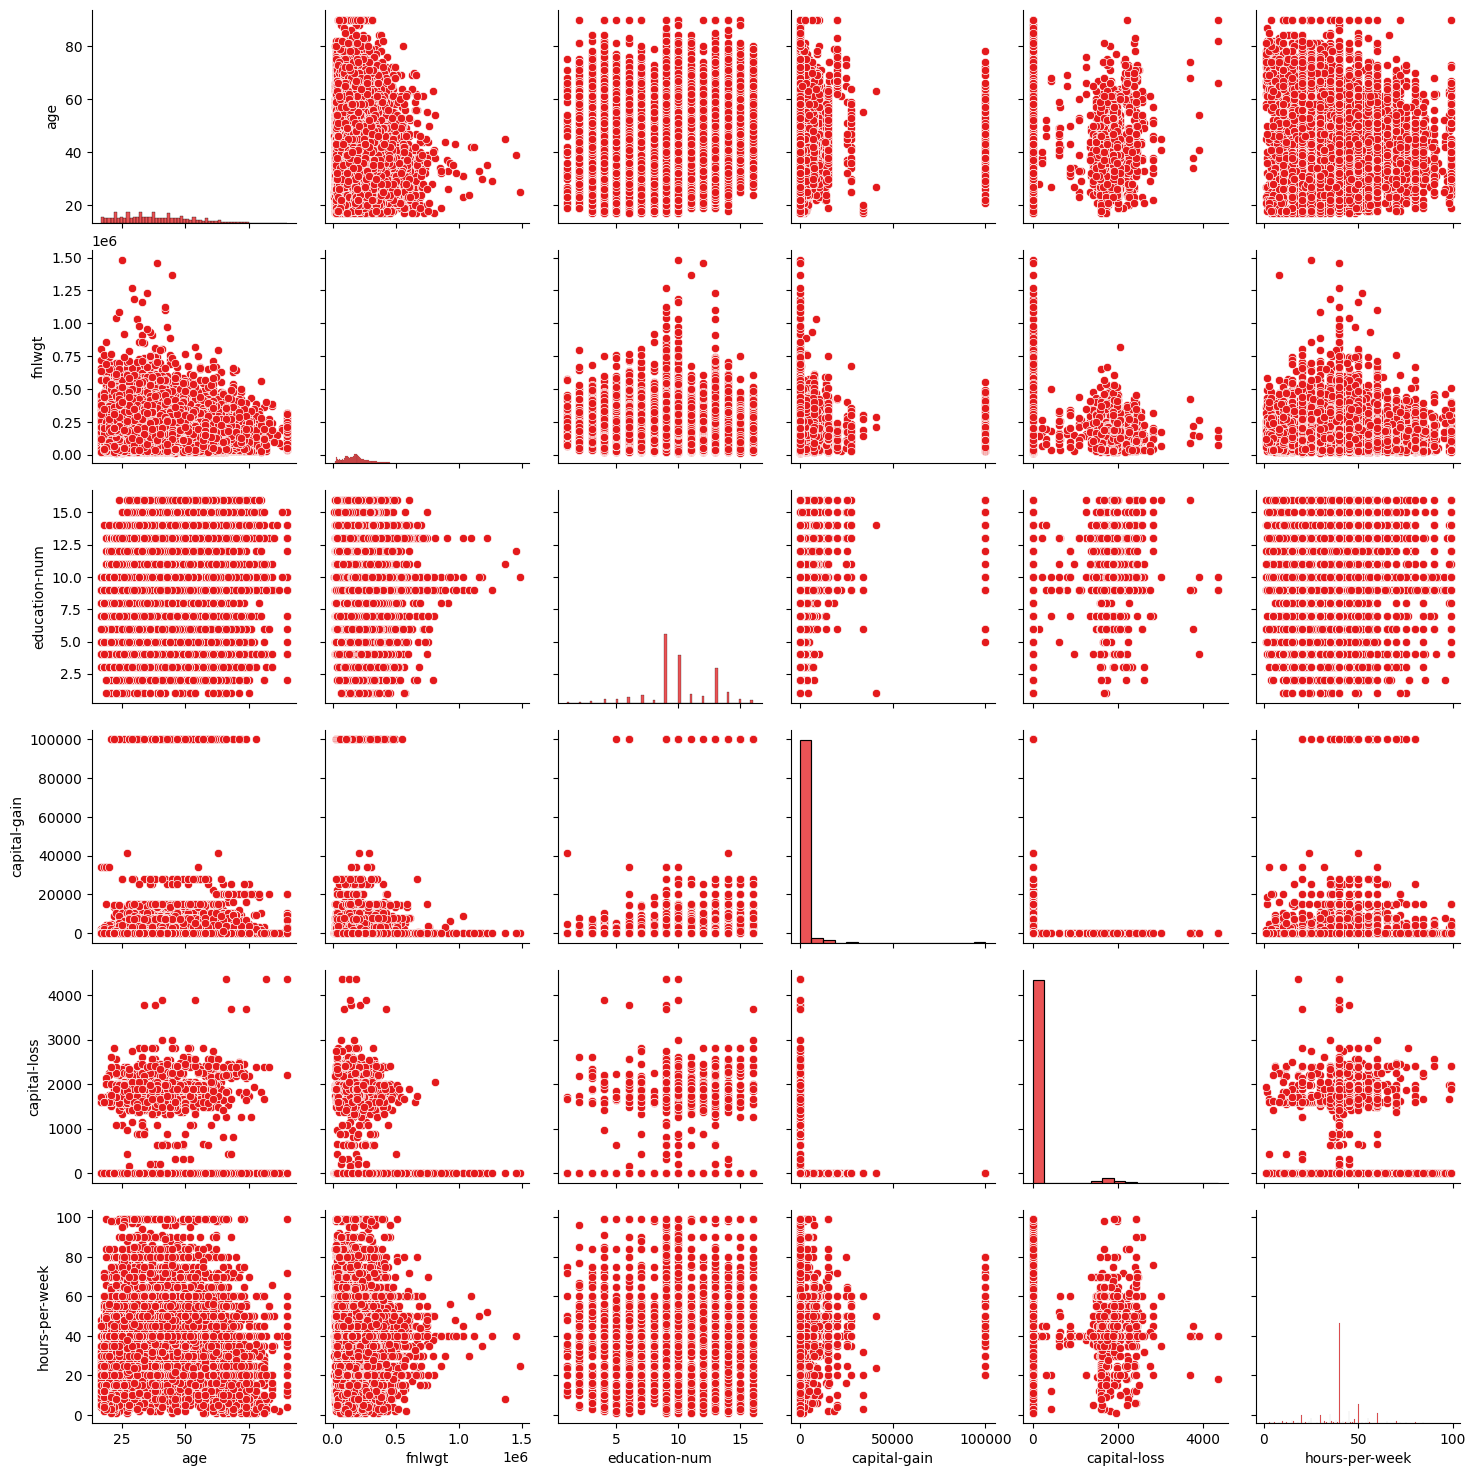

In [ ]:
plt.figure(figsize=(8, 4))
sns.pairplot(data)

#Data Cleaning

Checking for duplicate data

In [ ]:
duplicates = data[data.duplicated(data)]
duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(32537, 15)

In [ ]:
data['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
data['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
data['country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#In occupation, workclass and country columns we have NA values in the form of '?'

In [ ]:
#replacing '?' with nan values
import re

pattern = r'\?'

data['occupation'] = data['occupation'].str.replace(pattern, str(np.nan), regex=True)
data['workclass'] = data['workclass'].str.replace(pattern, str(np.nan), regex=True)
data['salary'] = data['salary'].str.replace(pattern, str(np.nan), regex=True)

In [ ]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 nan                  1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

#Replacing NAN values iwth mode of it's particular column

In [ ]:
data["workclass"] = data["workclass"].fillna(data["workclass"].mode())
data["occupation"] = data["occupation"].fillna(data["occupation"].mode())
data["country"] = data["country"].fillna(data["country"].mode())
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#Converting the Categorical data into Numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data['workclass'] = le.fit_transform(data['workclass'])
data['education'] = le.fit_transform(data['education'])
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['sex'] = le.fit_transform(data['sex'])
data['country'] = le.fit_transform(data['country'])
data['salary'] = le.fit_transform(data['salary'])

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,5,0


In [ ]:
df = data.copy()

In [ ]:
x = df.iloc[:, df.columns != 'salary']
y = df.iloc[:, df.columns == 'salary']

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=47)

x_train.shape, x_test.shape

((26048, 14), (6513, 14))

#Model Building

#1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(lr_pred, y_test)
accuracy

0.7867342238599724

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4946
           1       0.63      0.28      0.39      1567

    accuracy                           0.79      6513
   macro avg       0.72      0.61      0.63      6513
weighted avg       0.76      0.79      0.75      6513



In [ ]:
print(confusion_matrix(y_test, lr_pred))

[[4683  263]
 [1126  441]]


#2. Decision Tree Classifier

Using entropy criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion ='entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
pred = model.predict(x_test)
pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8436972209427299

In [ ]:
print(confusion_matrix(y_test, pred))

[[4680  266]
 [ 752  815]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4946
           1       0.75      0.52      0.62      1567

    accuracy                           0.84      6513
   macro avg       0.81      0.73      0.76      6513
weighted avg       0.84      0.84      0.83      6513



#3. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_samples=0.75, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, rf_pred)
accuracy

0.8515277138031629

In [ ]:
print(confusion_matrix(y_test, rf_pred))

[[4595  351]
 [ 616  951]]


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4946
           1       0.73      0.61      0.66      1567

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



#4. SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
pred = model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.7950253339474896

In [ ]:
print(confusion_matrix(y_test, pred))

[[4938    8]
 [1327  240]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4946
           1       0.97      0.15      0.26      1567

    accuracy                           0.80      6513
   macro avg       0.88      0.58      0.57      6513
weighted avg       0.83      0.80      0.73      6513



#5. KNN-Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': range(1, 11)}

In [ ]:
knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [ ]:
# Get the best 'k' value
best_k = grid_search.best_params_['n_neighbors']

In [ ]:
# Create a KNN classifier with the best 'k' value
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# Train the best classifier on the training data
best_knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Make predictions on the testing set
y_pred = best_knn_classifier.predict(x_test)

In [ ]:
# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best 'k' value:", best_k)
print("Accuracy:", accuracy)

Best 'k' value: 10
Accuracy: 0.7936434822662367


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4946
           1       0.73      0.23      0.34      1567

    accuracy                           0.79      6513
   macro avg       0.76      0.60      0.61      6513
weighted avg       0.78      0.79      0.75      6513



#6. Naive Bayes Classifier:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Predict the labels for the testing set
y_pred = naive_bayes_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7821280515891295
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      4946
           1       0.63      0.23      0.34      1567

    accuracy                           0.78      6513
   macro avg       0.71      0.59      0.61      6513
weighted avg       0.76      0.78      0.74      6513



#Hyperparameter Tunning

#Grid Search CV

In [ ]:
#Number of trees
n_estimators = [20,60,100,120]

max_features = [0.2,0.6,1.0]

max_depth = [2,8,None]

max_samples = [0.5,0.75,1.0]

In [ ]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_samples': max_samples
              }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose = 2,
                       n_jobs= -1)

In [ ]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 100}

In [ ]:
rf_grid.best_score_

0.8607954783707072

In [ ]:
pred = rf_grid.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8576692768309535

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4946
           1       0.74      0.62      0.68      1567

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



#Deployment

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(rf_pred, open(filename, 'wb'))

In [ ]:
#lodaing the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
accuracy = accuracy_score(y_test, loaded_model)
accuracy

0.933502024291498